In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [4]:
path_1 = r"D:\G6sulfur\ARID_dataset_2020s_G6sulfur.nc"
arid = xr.open_dataset(path_1)
path_2 = r"D:\G6sulfur\COLD_dataset_2020s_G6sulfur.nc"
cold = xr.open_dataset(path_2)
path_3 = r"D:\G6sulfur\POLAR_dataset_2020s_G6sulfur.nc"
polar = xr.open_dataset(path_3)
path_4 = r"D:\G6sulfur\TEMP_dataset_2020s_G6sulfur.nc"
temperate = xr.open_dataset(path_4)
path_5 = r"D:\G6sulfur\TROPICAL_dataset_2020s_G6sulfur.nc"
tropical = xr.open_dataset(path_5)

define all variables 

In [5]:
BWh = arid['BWh'].values
BWk = arid['BWk'].values
BSh = arid['BSh'].values
BSk = arid['BSk'].values
Af = tropical['Af'].values
Am = tropical['Am'].values
Aw = tropical['Aw'].values
Csa = temperate['Csa'].values
Csb = temperate['Csb'].values
Csc = temperate['Csc'].values
Cwa = temperate['Cwa'].values
Cwb = temperate['Cwb'].values
Cwc = temperate['Cwc'].values
Cfa = temperate['Cfa'].values
Cfb = temperate['Cfb'].values
Cfc = temperate['Cfc'].values
Dsa = cold['Dsa'].values
Dsb = cold['Dsb'].values
Dsc = cold['Dsc'].values
Dsd = cold['Dsd'].values
Dwa = cold['Dwa'].values
Dwb = cold['Dwb'].values
Dwc = cold['Dwc'].values
Dwd = cold['Dwd'].values
Dfa = cold['Dfa'].values
Dfb = cold['Dfb'].values
Dfc = cold['Dfc'].values
Dfd = cold['Dfd'].values
ET = polar['ET'].values
EF = polar['EF'].values

create dictionary for each variable for each climate zone

In [6]:
climate_datasets = {
    "BWh": {"dataset": BWh, "variable": "BWh"},  
    "BWk": {"dataset": BWk, "variable": "BWk"},
    "BSh": {"dataset": BSh, "variable": "BSh"},
    "BSk": {"dataset": BSk, "variable": "BSk"},
    "Af": {"dataset": Af, "variable": "Af"},
    "Am": {"dataset": Am, "variable": "Am"},
    "Aw": {"dataset": Aw, "variable": "Aw"},
    "Csa": {"dataset": Csa, "variable": "Csa"},
    "Csb": {"dataset": Csb, "variable": "Csb"},
    "Csc": {"dataset": Csc, "variable": "Csc"},
    "Cwa": {"dataset": Cwa, "variable": "Cwa"},
    "Cwb": {"dataset": Cwb, "variable": "Cwb"},
    "Cwc": {"dataset": Cwc, "variable": "Cwc"},
    "Cfa": {"dataset": Cfa, "variable": "Cfa"},
    "Cfb": {"dataset": Cfb, "variable": "Cfb"},
    "Cfc": {"dataset": Cfc, "variable": "Cfc"},
    "Dsa": {"dataset": Dsa, "variable": "Dsa"},
    "Dsb": {"dataset": Dsb, "variable": "Dsb"},
    "Dsc": {"dataset": Dsc, "variable": "Dsc"},
    "Dsd": {"dataset": Dsd, "variable": "Dsd"},
    "Dwa": {"dataset": Dwa, "variable": "Dwa"},
    "Dwb": {"dataset": Dwb, "variable": "Dwb"},
    "Dwc": {"dataset": Dwc, "variable": "Dwc"},
    "Dwd": {"dataset": Dwd, "variable": "Dwd"},
    "Dfa": {"dataset": Dfa, "variable": "Dfa"},
    "Dfb": {"dataset": Dfb, "variable": "Dfb"},
    "Dfc": {"dataset": Dfc, "variable": "Dfc"},
    "Dfd": {"dataset": Dfd, "variable": "Dfd"},
    "ET": {"dataset": ET, "variable": "ET"},
    "EF": {"dataset": EF, "variable": "EF"},
}

create unique colormap to use pcolormesh: assign colors to each zone, then plot entire map

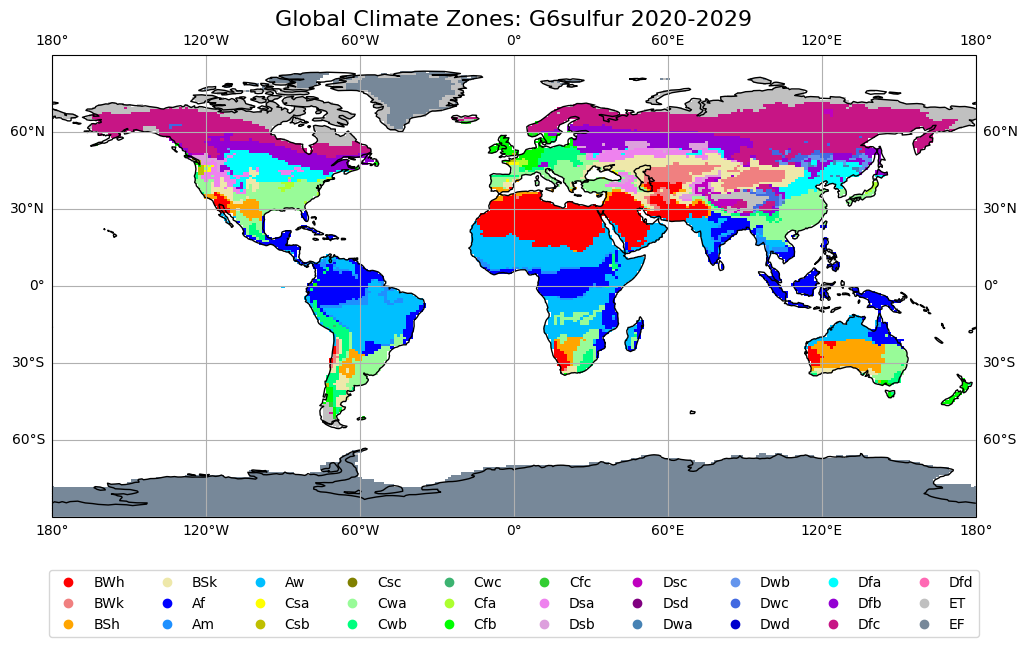

In [63]:
zone_ids = {"BWh": 1, "BWk": 2, "BSh": 3, "BSk": 4, "Af": 5, "Am":6, "Aw":7, "Csa":8, "Csb":9, "Csc":10, "Cwa":11, "Cwb":12, "Cwc":13, "Cfa":14, "Cfb":15, "Cfc":16, "Dsa":17, "Dsb":18, "Dsc":19, "Dsd":20,
            "Dwa":21, "Dwb":22, "Dwc":23, "Dwd":24, "Dfa":25, "Dfb":26, "Dfc":27, "Dfd":28, "EF":29, "ET":30}
zone_colors = {"BWh": "red", "BWk": "lightcoral", "BSh": "orange", "BSk": "palegoldenrod", "Af": "blue", "Am":"dodgerblue", "Aw":"deepskyblue", "Csa":"yellow", "Csb":"y",
              "Csc":"olive", "Cwa":"palegreen", "Cwb":"springgreen", "Cwc":"mediumseagreen", "Cfa":"greenyellow", "Cfb":"lime", "Cfc":"limegreen", "Dsa":"violet", "Dsb":"plum",
              "Dsc":"m", "Dsd":"purple", "Dwa":"steelblue", "Dwb":"cornflowerblue", "Dwc":"royalblue", "Dwd":"mediumblue", "Dfa":"aqua", "Dfb":"darkviolet", "Dfc":"mediumvioletred",
              "Dfd":"hotpink", "ET":"silver", "EF":"lightslategray"}

combined_grid = np.full_like(arid["lat"].values[:, None] * arid["lon"].values[None, :], np.nan)
#this is filling the combined grid so it represents all of the data points
for zone, info in climate_datasets.items():
    ds = info["dataset"]
    variable = info["variable"]
    data = ds
    mask = ~np.isnan(data) & (data > 0)  
    combined_grid[mask] = zone_ids[zone]

#creating custom colormap from color designations above
cmap = mcolors.ListedColormap([zone_colors[zone] for zone in zone_ids.keys()])
bounds = [0.5 + i for i in range(len(zone_ids) + 1)]
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_title("Global Climate Zones: G6sulfur 2020-2029", fontsize=16)
lon, lat = np.meshgrid(arid["lon"].values, arid["lat"].values)
pcolormesh = ax.pcolormesh(lon, lat, combined_grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
#adding a legend/key :)
handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", label=zone)
    for zone, color in zone_colors.items()
]
ax.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=10)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.savefig('/Users/jaybr/OneDrive/Desktop/UROP/G6sulfur_20s.png', bbox_inches='tight') 
plt.show()